In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# configure matplotlib to use latex so we're able to use the libertine font
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}',
                                       r'\usepackage[libertine]{newtxmath}',
                                       r'\usepackage{sfmath}',
                                       r'\usepackage[T1]{fontenc}'
                                      ]

%load_ext autoreload
%autoreload 2

In [2]:
import eshotgun as es

# set to true to save images
save_images = False

# Load results for synthtic problems (main evaluated methods)

In [3]:
results_dir = r'results'

main_method_names = [
    'LP', 'PLAyBOOK', 'hallu_EI', 'qEI', 'TS',
    'eShotgun_0.1', 'eShotgun_0.1_True', 
    'eShotgun_0.0',
]

main_method_names_for_paper = [
    'LP', 'PLAyBOOK', 'KB', 'qEI', 'TS',
    '$\epsilon$S-RS (0.1)', '$\epsilon$S-PF (0.1)',
    '$\epsilon$S-0',
]

problem_names = [
    'WangFreitas', 'BraninForrester', 'Branin', 'Cosines', 
    'logGoldsteinPrice', 'logSixHumpCamel', 'modHartman6', 
    'logGSobol', 'logStyblinskiTang', 'logRosenbrock'
]

problem_names_for_paper = problem_names

problem_logplot = [
    True, True, True, True,
    True, True, True,
    False, False, False
]

batch_sizes = [2, 5, 10, 20]

exp_no_start = 1
exp_no_end = 51
budget = 200

In [4]:
main_results = es.plotting.load_results(results_dir, problem_names, 
                                        main_method_names, batch_sizes, 
                                        budget, exp_no_start, exp_no_end)

In [5]:
LABEL_FONTSIZE=20
TICK_FONTSIZE=20
LEGEND_FONTSIZE=20

TITLE_FONTSIZE=20

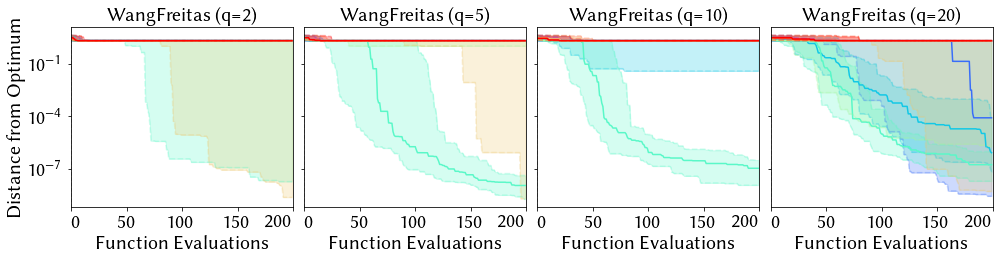

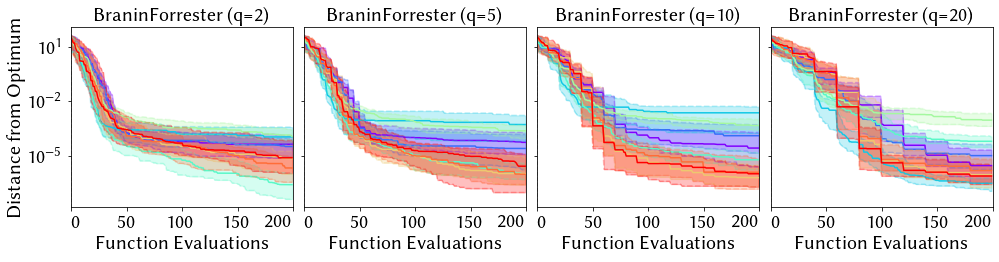

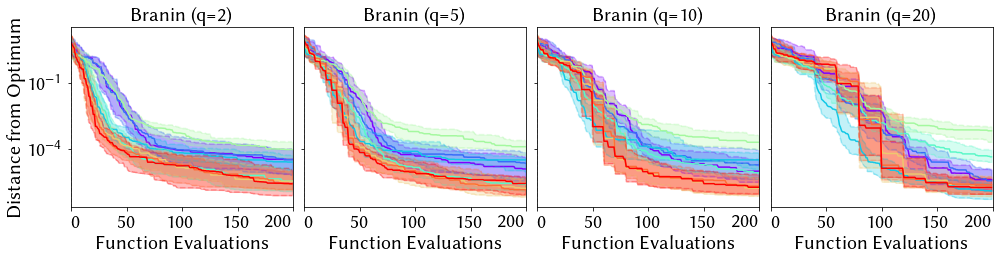

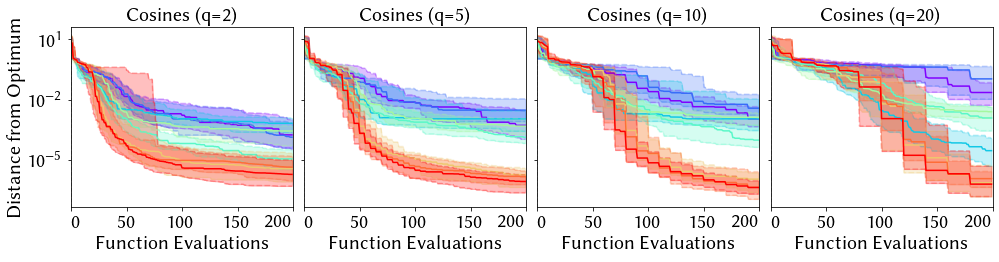

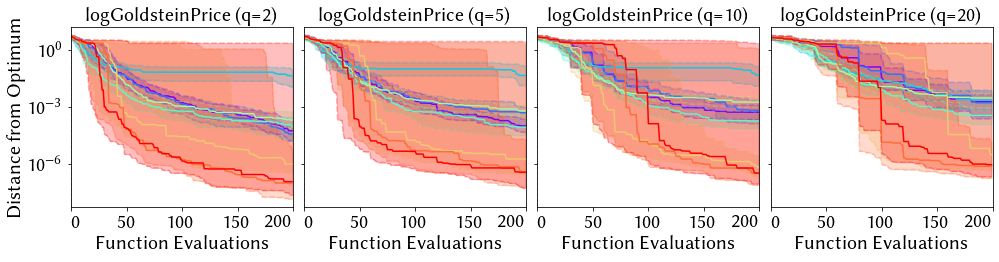

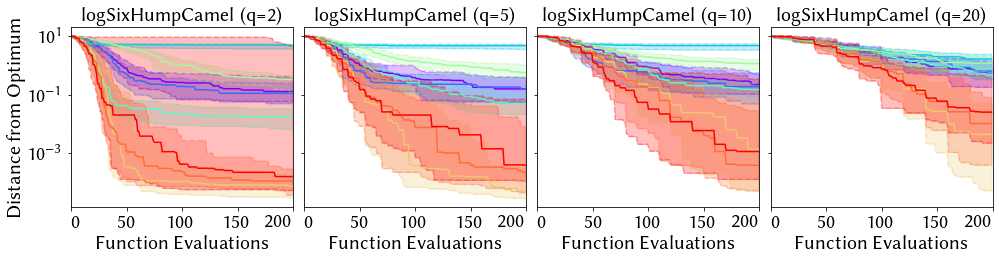

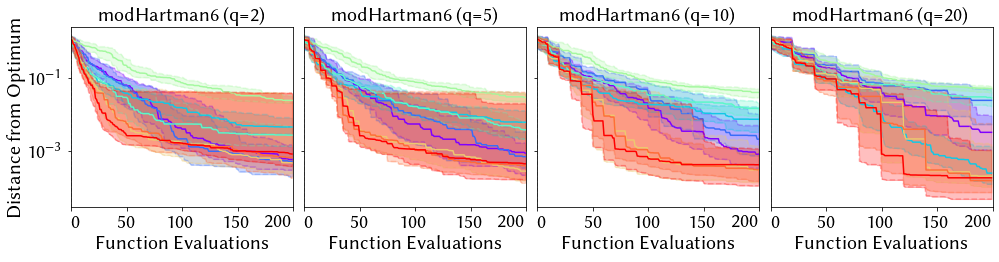

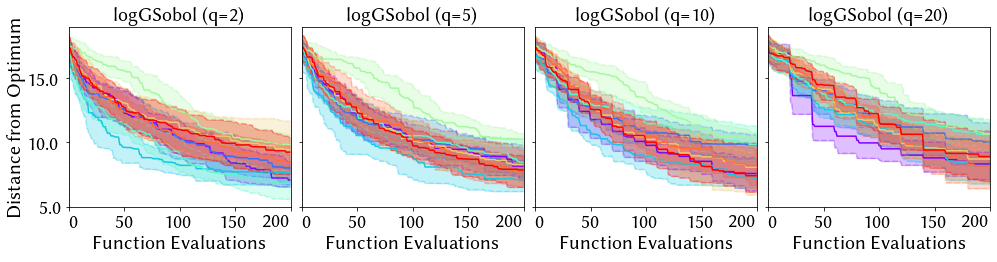

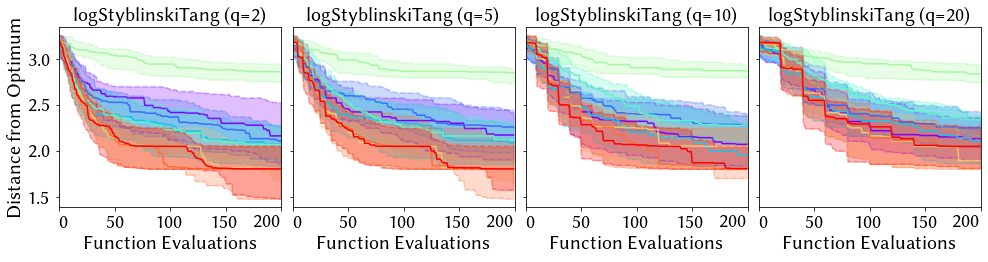

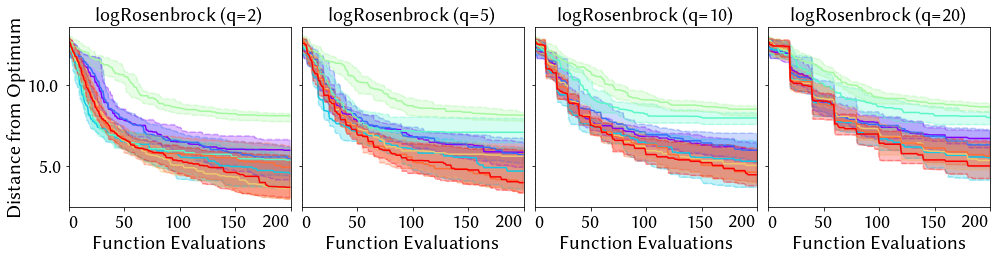

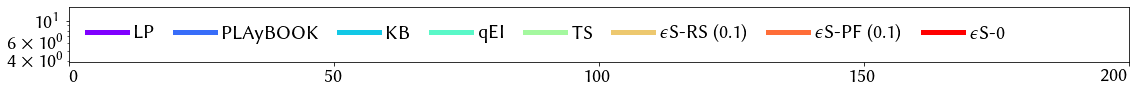

In [6]:
es.plotting.plot_convergence(main_results, problem_names, 
                             problem_names_for_paper,
                             problem_logplot, batch_sizes, main_method_names,
                             main_method_names_for_paper, 
                             LABEL_FONTSIZE, TITLE_FONTSIZE, 
                             LEGEND_FONTSIZE, TICK_FONTSIZE, 
                             save=save_images)

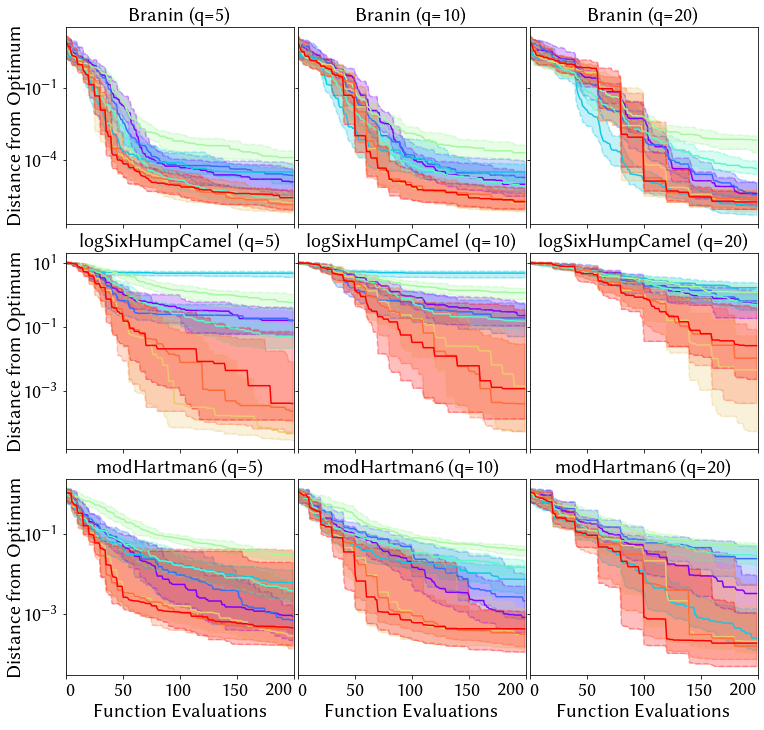

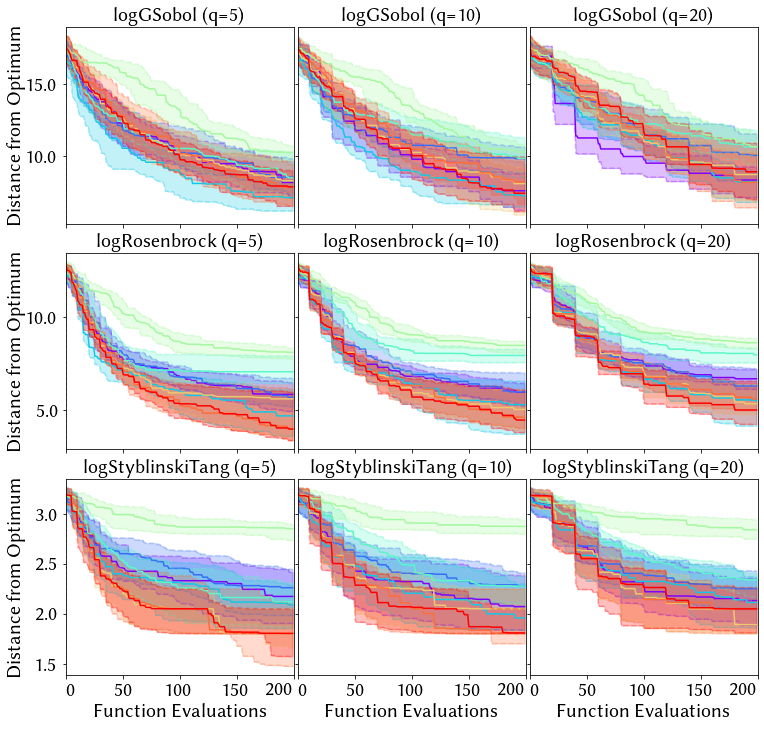

In [7]:
for i in range(2):
    if i == 0:
        comb_problem_names = ['Branin', 'logSixHumpCamel', 'modHartman6']
        comb_problem_names_for_paper = comb_problem_names
        comb_problem_logplot = [True, True, True]
    
    if i == 1:
        comb_problem_names = ['logGSobol', 'logRosenbrock', 'logStyblinskiTang']
        comb_problem_names_for_paper = comb_problem_names
        comb_problem_logplot = [False, False, False]
        
    es.plotting.plot_convergence_combined(main_results, 
                              comb_problem_names, 
                              comb_problem_names_for_paper,
                              comb_problem_logplot, 
                              [5, 10, 20], 
                              main_method_names,
                              main_method_names_for_paper, 
                              LABEL_FONTSIZE, TITLE_FONTSIZE, 
                              TICK_FONTSIZE, save=save_images)

In [8]:
main_method_names_for_table = [
    'LP', 'PLAyBOOK', 'KB', 'qEI', 'TS',
    r'\eSRS (0.1)', r'\eSPF (0.1)', r'\eExploit'
]

problem_rows = [['WangFreitas', 'BraninForrester', 'Branin', 
                 'Cosines', 'logGoldsteinPrice'],
                ['logSixHumpCamel', 'modHartman6', 
                 'logGSobol', 'logRosenbrock', 'logStyblinskiTang']
               ]

problem_paper_rows = problem_rows # 
problem_dim_rows = [[1, 2, 2, 
                     2, 2], 
                    [2, 6, 
                     10, 10, 10
                    ]
                   ]

In [9]:
bs_table_data = []
for batch_size in batch_sizes:
    temp = es.plotting.create_table_data(main_results[batch_size],
                                         problem_names,
                                         main_method_names,
                                         51,
                                         use_correction=True)
    bs_table_data.append(temp)
    


for i, bs in enumerate(batch_sizes):
    cap = 'batch size: {:d}'.format(bs)
    
    es.plotting.create_table(bs_table_data[i], problem_rows, 
                             problem_paper_rows, problem_dim_rows, 
                             main_method_names, main_method_names_for_table,
                             caption=cap)


  \begin{table*}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{1\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c|}{\bfseries WangFreitas (1)} 
    & \multicolumn{2}{c|}{\bfseries BraninForrester (2)} 
    & \multicolumn{2}{c|}{\bfseries Branin (2)} 
    & \multicolumn{2}{c|}{\bfseries Cosines (2)} 
    & \multicolumn{2}{c}{\bfseries logGoldsteinPrice (2)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c|}{MAD}
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LP & 2.00e+00 & 2.15e-08 & 4.23e-05 & 5.66e-05 & 3.24e-05 & 4.30e-05 & \statsimilar 1.73e-04 & \statsimilar 2.44e-04 & \statsimilar 5.56e-05 & \statsimilar 7.75e-05 \\
    PLAyBOOK & 2.00e+00

# $\epsilon$-shotgun (random and PF)

In [10]:
es_method_names = [
    'eShotgun_0.0',
    'eShotgun_0.1',
    'eShotgun_0.2',
    'eShotgun_0.3',
    'eShotgun_0.4',
    'eShotgun_0.5',
    'eShotgun_1.0',
    'eShotgun_0.1_True',
    'eShotgun_0.2_True',
    'eShotgun_0.3_True',
    'eShotgun_0.4_True',
    'eShotgun_0.5_True',
    'eShotgun_1.0_True',
]

es_method_names_for_paper = [
    '$\epsilon$S-RS (0.0)',
    '$\epsilon$S-RS (0.1)',
    '$\epsilon$S-RS (0.2)',
    '$\epsilon$S-RS (0.3)',
    '$\epsilon$S-RS (0.4)',
    '$\epsilon$S-RS (0.5)',
    '$\epsilon$S-RS (1.0)',
    
    '$\epsilon$S-PF (0.1)',
    '$\epsilon$S-PF (0.2)',
    '$\epsilon$S-PF (0.3)',
    '$\epsilon$S-PF (0.4)',
    '$\epsilon$S-PF (0.5)',
    '$\epsilon$S-PF (1.0)',
]

In [11]:
es_compare_results = es.plotting.load_results(results_dir, ['WangFreitas'], 
                                              es_method_names, [2,5,10], 
                                              budget, exp_no_start, exp_no_end)

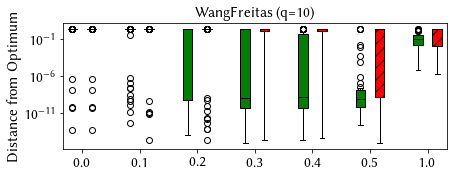

In [12]:
es_method_compare_names = [
    'eShotgun_0.0',
    'eShotgun_0.0',
    'eShotgun_0.1',
    'eShotgun_0.1_True',
    'eShotgun_0.2',
    'eShotgun_0.2_True',
    'eShotgun_0.3',
    'eShotgun_0.3_True',
    'eShotgun_0.4',
    'eShotgun_0.4_True',
    'eShotgun_0.5',
    'eShotgun_0.5_True',
    'eShotgun_1.0',
    'eShotgun_1.0_True',
]

es_boxplot_problems = ['WangFreitas']
es_boxplot_problems_paper = ['WangFreitas']

LF = LABEL_FONTSIZE -5
TTLE_F = TITLE_FONTSIZE-5
T_F = TICK_FONTSIZE - 5

es.plotting.plot_egreedy_comparison(es_compare_results[10],
                          [200],
                          es_boxplot_problems,
                          es_boxplot_problems_paper,
                          problem_logplot,
                          es_method_compare_names,
                          [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
                          LF,
                          TTLE_F,
                          T_F,
                          save=save_images)

# Push results

In [13]:
push_problem_names = ['push4', 'push8']

push_problem_names_for_paper = [r'$\textsc{push4}$', 
                                r'$\textsc{push8}$']

push_problem_logplot = [
    True,
    False
]

In [14]:
push_results = es.plotting.load_results(results_dir, push_problem_names, 
                                        main_method_names, batch_sizes, 
                                        budget, exp_no_start, exp_no_end)

In [15]:
# load the best push8 results found by uniformly sampling 100000 decision vectors 
# and locally optimising the best 100 of these with L-BFGS-B.
# push8_estimated_optima[i] contains the (i+1)'th problem instance's 
with np.load(r'push8_best_solutions.npz') as data:
    push8_estimated_optima = data['results']
    
# calculate the distance from each push8 run to the corresponding estimated optima
for q in batch_sizes:
    for method_name in main_method_names:
        dist = push_results[q]['push8'][method_name] - push8_estimated_optima[:, None]

        # simple sanity checking - check the distance between them is >= 0, meaning that
        # the estimated optima are better or equal to the evaluated function values
        # assert np.all(dist >= 0)

        push_results[q]['push8'][method_name] = dist

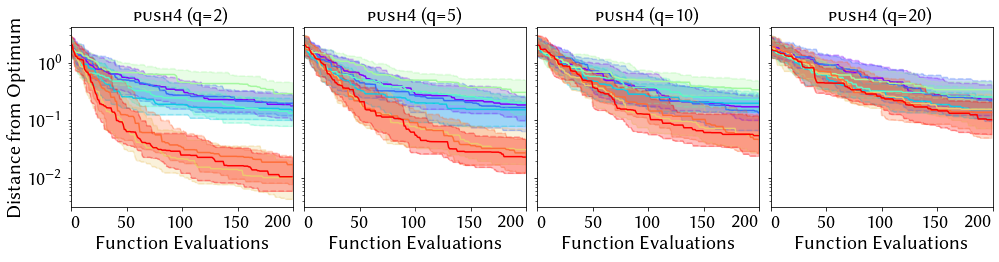

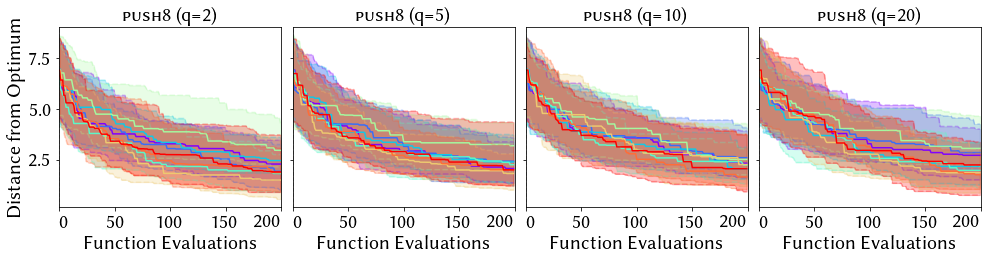

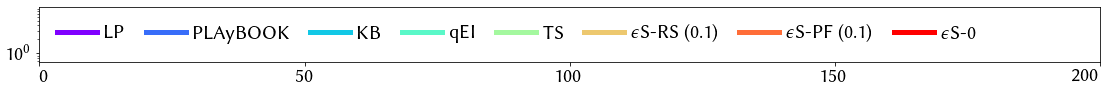

In [16]:
es.plotting.plot_convergence(push_results, push_problem_names, 
                             push_problem_names_for_paper,
                             push_problem_logplot, batch_sizes, 
                             main_method_names,
                             main_method_names_for_paper, 
                             LABEL_FONTSIZE, TITLE_FONTSIZE, 
                             LEGEND_FONTSIZE, TICK_FONTSIZE, 
                             save=save_images)

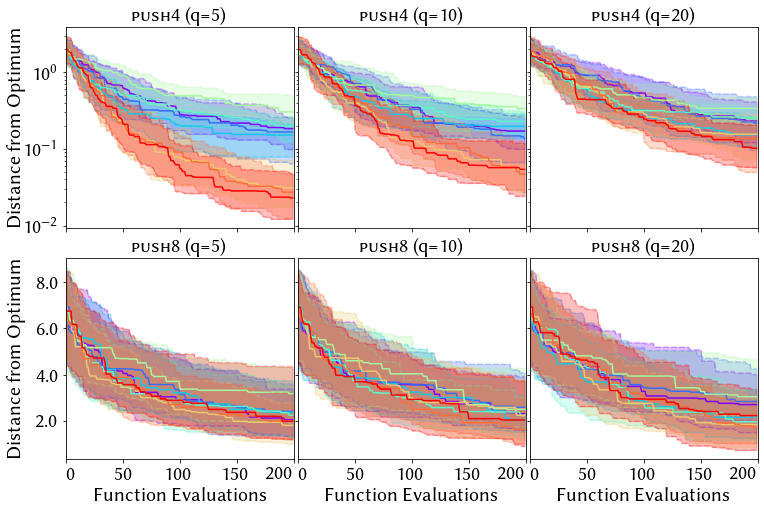

In [17]:
es.plotting.plot_convergence_combined(push_results, 
                          push_problem_names, 
                          push_problem_names_for_paper,
                          push_problem_logplot, 
                          [5, 10, 20], 
                          main_method_names,
                          main_method_names_for_paper, 
                          LABEL_FONTSIZE, TITLE_FONTSIZE, 
                          TICK_FONTSIZE, save=save_images)

In [18]:
pd_problem_rows = [['push4'], ['push8']]
pd_problem_dim_rows = [[4], [8]]

pd_problem_paper_rows = [[r'$\textsc{push4}$'],
                          [r'$\textsc{push8}$']]

bs_table_data = []
for batch_size in batch_sizes:
    temp = es.plotting.create_table_data(push_results[batch_size],
                                         push_problem_names, 
                                         main_method_names,
                                         51,
                                         use_correction=True)
    bs_table_data.append(temp)

for i, bs in enumerate(batch_sizes):
    cap = 'batch size: {:d}'.format(bs)

    es.plotting.create_table(bs_table_data[i], 
                             pd_problem_rows, 
                             pd_problem_paper_rows, 
                             pd_problem_dim_rows, 
                             main_method_names, 
                             main_method_names_for_table,
                             caption=cap)


  \begin{table*}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{1\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c}{\bfseries $\textsc{push4}$ (4)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LP & 1.78e-01 & 1.30e-01 \\
    PLAyBOOK & 1.97e-01 & 1.19e-01 \\
    KB & 1.50e-01 & 8.05e-02 \\
    qEI & 1.33e-01 & 8.07e-02 \\
    TS & 2.89e-01 & 1.77e-01 \\
    \eSRS (0.1) & \best 1.02e-02 & \best 9.70e-03 \\
    \eSPF (0.1) & \statsimilar 1.71e-02 & \statsimilar 1.27e-02 \\
    \eExploit & \statsimilar 1.05e-02 & \statsimilar 1.03e-02 \\
\bottomrule
    \toprule
    \bfseries Method
    & \multicolumn{2}{c}{\bfseries $\textsc{push8}$ (8)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LP & \statsimilar 2.28e+00 & \statsimilar 1.43e+00 \\
    PLAyBOOK & \statsimilar 1.92e+00 & \statsimilar 1.58e+

# PitzDaily

In [19]:
pd_problem_names = [
    'PitzDaily'
]

pd_problem_names_for_paper = pd_problem_names

pd_problem_logplot = [
    False
]

exp_no_start = 1
exp_no_end = 51
budget = 200

In [20]:
pd_results = es.plotting.load_results(results_dir, pd_problem_names, 
                                      main_method_names, batch_sizes, 
                                      budget, exp_no_start, exp_no_end)

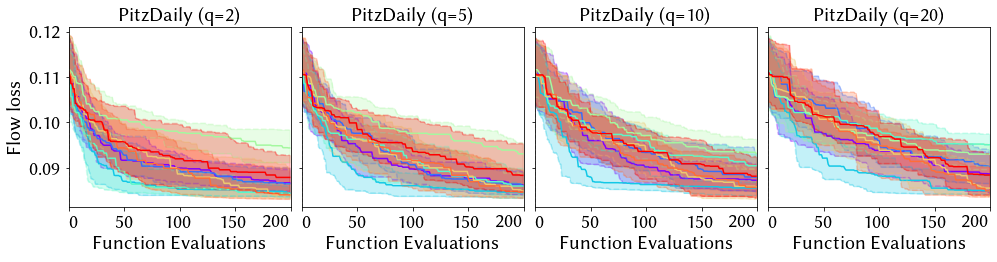

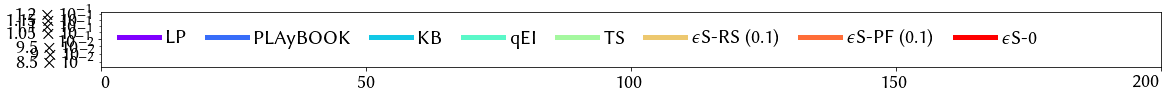

In [21]:
es.plotting.plot_convergence(pd_results, pd_problem_names,
                             pd_problem_names_for_paper,
                             pd_problem_logplot, batch_sizes, 
                             main_method_names, main_method_names_for_paper, 
                             LABEL_FONTSIZE, TITLE_FONTSIZE, 
                             LEGEND_FONTSIZE, TICK_FONTSIZE,
                             ylabel='Flow loss',
                             save=save_images)

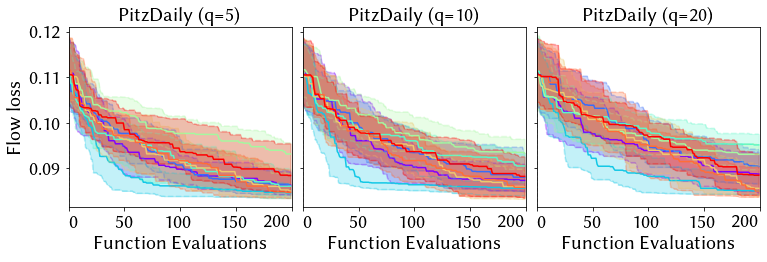

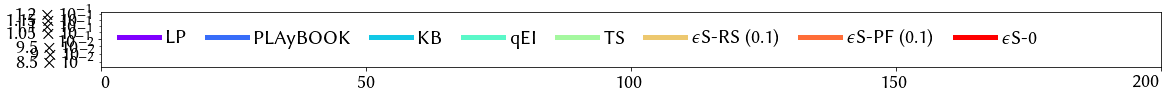

In [22]:
es.plotting.plot_convergence(pd_results, pd_problem_names, 
                             pd_problem_names_for_paper,
                             pd_problem_logplot, [5, 10, 20], 
                             main_method_names, main_method_names_for_paper, 
                             LABEL_FONTSIZE, TITLE_FONTSIZE, 
                             LEGEND_FONTSIZE, TICK_FONTSIZE,
                             ylabel='Flow loss',
                             save=save_images)

In [23]:
pd_problem_rows = [['PitzDaily']]
pd_problem_dim_rows = [[10]]

pd_problem_paper_rows = pd_problem_rows

bs_table_data = []
for batch_size in batch_sizes:
    temp = es.plotting.create_table_data(pd_results[batch_size],
                                         pd_problem_names, 
                                         main_method_names,
                                         51,
                                         use_correction=True)
    bs_table_data.append(temp)

for i, batch_size in enumerate(batch_sizes):
    cap = 'batch size: {:d}'.format(batch_size)
    es.plotting.create_table(bs_table_data[i], 
                             pd_problem_rows, 
                             pd_problem_paper_rows, 
                             pd_problem_dim_rows, 
                             main_method_names, 
                             main_method_names_for_table,
                             caption=cap)


  \begin{table*}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alignment=center}
  \resizebox{1\textwidth}{!}{%
  \begin{tabular}{l | SS| SS| SS| SS| SS}
    \toprule
    \bfseries Method
    & \multicolumn{2}{c}{\bfseries PitzDaily (10)} \\ 
    & \multicolumn{1}{c}{Median} & \multicolumn{1}{c}{MAD}  \\ \midrule
    LP & \statsimilar 8.67e-02 & \statsimilar 3.38e-03 \\
    PLAyBOOK & \statsimilar 8.65e-02 & \statsimilar 3.80e-03 \\
    KB & \statsimilar 8.44e-02 & \statsimilar 1.58e-03 \\
    qEI & \statsimilar 8.43e-02 & \statsimilar 1.49e-03 \\
    TS & 9.44e-02 & 5.25e-03 \\
    \eSRS (0.1) & \statsimilar 8.40e-02 & \statsimilar 1.49e-03 \\
    \eSPF (0.1) & \best 8.40e-02 & \best 1.42e-03 \\
    \eExploit & 8.79e-02 & 5.91e-03 \\
\bottomrule
  \end{tabular}
  }
  \vspace*{0.1mm}
  \caption{batch size: 2}
  \label{tbl:synthetic_results}
  \end{table*}


  \begin{table*}[t]
  \setlength{\tabcolsep}{2pt}
  \sisetup{table-format=1.2e-1,table-number-alig

# Summary plot of the synthetic functions

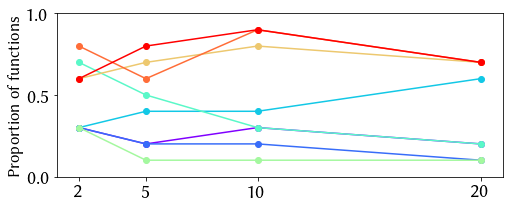

In [24]:
# original
n_equal_to_best = np.array([[3, 2, 3, 2],  # LP
                            [3, 2, 2, 1],  # PLAyBOOK
                            [3, 4, 4, 6],  # KB
                            [7, 5, 3, 2],  # qEI
                            [3, 1, 1, 1],  # TS
                            [6, 7, 8, 7],  # eS-RS
                            [8, 6, 9, 7],  # es-PF
                            [6, 8, 9, 7]], dtype='float')  #  es-0

colors = plt.cm.rainbow(np.linspace(0, 1, 8))  # same as conv plots

n_equal_to_best /= 10

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
for (res, name, col) in zip(n_equal_to_best, main_method_names_for_paper, 
                            colors):
    ax.plot(batch_sizes, res, 'o-', color=col,  
            zorder=2 if name != 'LP' else 2)
    
ax.set_xlim([1, 21])
ax.set_xticks([2, 5, 10, 20])
ax.set_xticklabels([2, 5, 10, 20])
ax.set_ylim([0, 1])

ax.set_yticks([0.0, 0.5, 1.0])
ax.set_yticklabels([0.0, 0.5, 1.0])

ax.set_ylabel('Proportion of functions', fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE)
ax.tick_params(axis='both', which='minor', labelsize=LABEL_FONTSIZE)
if save_images:
    plt.savefig('synthetic_best_frequency.pdf', bbox_inches='tight')
plt.show()